# **Загрузка данных, предобработка, обучение модели**

## **Скачивание архива с данными из облака и распаковка архива**

In [ ]:
!gdown --id 120fgForM_FPs6VLorTEehhbjagJfJBRv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=120fgForM_FPs6VLorTEehhbjagJfJBRv
To: /content/merged_data.zip
100% 53.5M/53.5M [00:01<00:00, 50.6MB/s]


In [ ]:
!unzip /content/merged_data.zip

Archive:  /content/merged_data.zip
  inflating: merged_data.csv         


In [ ]:
!rm /content/merged_data.zip

## **Предобработка данных**

Импорт библиотек

In [ ]:
# handle data
import numpy as np
import pandas as pd

# preprocess
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn import metrics

# visualization
import matplotlib.pyplot as plt

Считывание файла и проверка

In [ ]:
united_data = pd.read_csv('/content/merged_data.csv', sep=',')

In [ ]:
united_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441719 entries, 0 to 1441718
Data columns (total 54 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1441719 non-null  int64  
 1   Timestamp      1441719 non-null  object 
 2   FIT101         1441719 non-null  float64
 3   LIT101         1441719 non-null  float64
 4   MV101          1441719 non-null  int64  
 5   P101           1441719 non-null  int64  
 6   P102           1441719 non-null  int64  
 7   AIT201         1441719 non-null  float64
 8   AIT202         1441719 non-null  float64
 9   AIT203         1441719 non-null  float64
 10  FIT201         1441719 non-null  float64
 11  MV201          1441719 non-null  int64  
 12  P201           1441719 non-null  int64  
 13  P202           1441719 non-null  int64  
 14  P203           1441719 non-null  int64  
 15  P204           1441719 non-null  int64  
 16  P205           1441719 non-null  int64  
 17  P206    

In [ ]:
# удаление лишнего столбца
united_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# превращение колонки с временем в индекс
united_data = united_data.set_index('Timestamp')

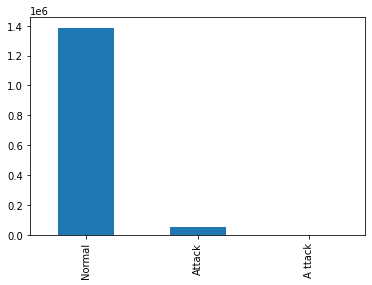

In [ ]:
# проверка значений целевой переменной
united_data["Normal/Attack"].value_counts().plot(kind='bar')

In [ ]:
# обработка целевой переменной
united_data['Normal/Attack'] = united_data['Normal/Attack'].str.replace(' ', '')
united_data.loc[united_data["Normal/Attack"] == "Normal", "Normal/Attack"] = 0
united_data.loc[united_data["Normal/Attack"] == "Attack", "Normal/Attack"] = 1

In [ ]:
united_data

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0
28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0
28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0
28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0
28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28/12/2015 9:59:55 AM,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,2,...,2,1,250.8171,1.778105,189.8552,0.000128,1,1,1,0
28/12/2015 9:59:56 AM,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,2,...,2,1,250.8171,1.778105,189.5027,0.000128,1,1,1,0
28/12/2015 9:59:57 AM,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,2,...,2,1,250.8171,1.778105,189.5027,0.000128,1,1,1,0


## **Обучение модели**

Используем стандартную классификацию с помощью логистической регрессии чтобы получить модель, которая предсказывает, идет ли атака в текущий момент времени

### **LogReg**

In [ ]:
classifier = LogisticRegression(random_state=0)

In [ ]:
# скалирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(united_data.drop('Normal/Attack', axis=1))

In [ ]:
# разбиение датасета
Y = united_data['Normal/Attack']
Y = Y.astype('int')
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, random_state=0, stratify=Y)

In [ ]:
united_data['Normal/Attack'].value_counts(ascending=True)

1      54621
0    1387098
Name: Normal/Attack, dtype: int64

Обучение

In [ ]:
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
predicted_y = classifier.predict(X_test)
predicted_y

array([0, 0, 0, ..., 0, 0, 0])

Метрика accuracy по классификации:

In [ ]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.99


Все метрики:

In [ ]:
print(metrics.accuracy_score(Y_test,predicted_y))
print(metrics.precision_score(Y_test,predicted_y))
print(metrics.recall_score(Y_test,predicted_y))
print(metrics.f1_score(Y_test,predicted_y))

0.9897289348833338
0.9826398991368441
0.741999267667521
0.8455311691563047


### **Кластеризация**

Для оценки того, какие другие зависимости есть в данных, стоим модель кластеризации для попытки группировки схожих параметров при атаках и в нормальном состоянии в кластеры

#### **K-means**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = united_data
df = df.drop('Normal/Attack', axis=1)

In [ ]:
X_std = StandardScaler().fit_transform(df)

In [ ]:
Y = united_data['Normal/Attack']
Y = Y.astype('int')
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, random_state=0, stratify=Y)

**Обучение модели**

In [ ]:
km = KMeans(n_clusters = 2, init='k-means++', max_iter=100)
km.fit(X_std)

KMeans(max_iter=100, n_clusters=2)

In [ ]:
y_pred = km.labels_.astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0 1404939]
 [      1   36780]]


Сравнение получившихся кластеров с целевой переменной датасета

In [ ]:
print(metrics.accuracy_score(united_data['Normal/Attack'].astype('int'),y_pred))

0.9810177988914622


**Попробуем 3 кластера**

In [ ]:
km1 = KMeans(n_clusters = 3, init='k-means++', max_iter=100)
km1.fit(X_std)

KMeans(max_iter=100, n_clusters=3)

In [ ]:
y_pred_1 = km1.labels_.astype(int)
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0 1404939]
 [      1   36780]]


In [ ]:
labels_1 = km1.labels_

n_clusters_ = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_ = list(labels_1).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Y, labels_1))
print("Completeness: %0.3f" % metrics.completeness_score(Y, labels_1))
print("V-measure: %0.3f" % metrics.v_measure_score(Y, labels_1))

Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.443
Completeness: 0.107
V-measure: 0.172


Видим, что выделились кластеры по схожим значениям

#### **DBSCAN**

Попробуем выделить зависимости без заранее определенного количества кластеров с помощью DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# тк алгоритм ресурсоемкий, для обучения возьмем записи на каждой 10 секунде
db_data = united_data[::10]
y_disp = db_data['Normal/Attack'].astype('int')
db_data = db_data.drop('Normal/Attack', axis=1)
db_data

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
Timestamp,,,,,,,,,,,,,,,,,,,,,
28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1
28/12/2015 10:00:10 AM,2.630433,524.1028,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,0.308106,2,1,251.1055,1.649953,189.8231,0.000128,1,1,1
28/12/2015 10:00:20 AM,2.489191,522.7290,2,2,1,262.0161,8.390669,328.3773,2.439881,2,...,0.308362,2,1,251.1856,1.649953,189.8872,0.000128,1,1,1
28/12/2015 10:00:30 AM,2.554847,524.6523,2,2,1,262.0161,8.390669,328.6337,2.439881,2,...,0.306569,2,1,251.0414,1.649953,189.8071,0.000128,1,1,1
28/12/2015 10:00:40 AM,2.589117,525.3196,2,2,1,262.0161,8.392271,328.4030,2.439881,2,...,0.308426,2,1,250.6569,1.649953,189.3425,0.000128,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28/12/2015 9:59:11 AM,2.599686,522.6897,2,2,1,262.0161,8.391951,328.5312,2.440906,2,...,0.308362,2,1,251.1055,1.778105,189.7590,0.000128,1,1,1
28/12/2015 9:59:21 AM,2.580469,523.3570,2,2,1,262.0161,8.388105,328.5312,2.442316,2,...,0.306633,2,1,251.2016,1.698010,189.9994,0.000128,1,1,1
28/12/2015 9:59:31 AM,2.428979,521.9832,2,2,1,262.0161,8.388105,328.6593,2.440393,2,...,0.306633,2,1,251.2176,1.698010,189.8872,0.000128,1,1,1


In [ ]:
unique, counts = np.unique(y_disp, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 138704]
 [     1   5468]]


In [ ]:
X_scales_db = StandardScaler().fit_transform(db_data)

Обучение

In [ ]:
dbscan = DBSCAN()
dbscan.fit(X_scales_db)

DBSCAN()

In [ ]:
y_pred_db = dbscan.labels_.astype(int)
y_pred_db

array([0, 0, 0, ..., 0, 0, 0])

Оценка точности модели

In [ ]:
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_disp, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_disp, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_disp, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_disp, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y_disp, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_scales_db, labels))

Estimated number of clusters: 795
Estimated number of noise points: 5225
Homogeneity: 0.839
Completeness: 0.035
V-measure: 0.068
Adjusted Rand Index: 0.013
Adjusted Mutual Information: 0.066
Silhouette Coefficient: 0.149


Визуализация выделенных кластеров

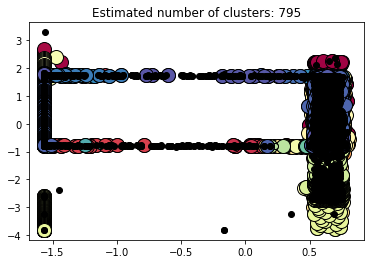

In [ ]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_scales_db[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_scales_db[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Получили слабые показатели оценки точности модели, необходим дальнейший анализ показателей

### **TadGAN**

Для оценки аномалий во временном ряду замера приборов используем алгоритм Timeseries anomaly detection with Generative Adversarial Network (TadGAN)

**Библиотеки**

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Sequential, Model

from tqdm import tqdm

from sklearn.preprocessing import MinMaxScaler

#### **Функции модели**

In [ ]:
def draw_losses(aeLoss, cxLoss, czLoss, cx_g_Loss, cz_g_Loss):
    """
    Рисует графики массивов, которые в программе используются для хранения ошибок
    """    
    plt.figure(figsize=(20,10))
    plt.plot(aeLoss, label="aeLoss")
    plt.plot(cxLoss, label="cxLoss")
    plt.plot(czLoss, label="czLoss")
    plt.plot(cx_g_Loss, label="cx_g_Loss")
    plt.plot(cz_g_Loss, label="cz_g_Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
def get_reconstruction_segment(model, values, start, end):
    """
    Автокодировщик model получает на вход сигнал values и 
    возвращает реконструированные (декодированные) значения 
    для заданного сегмента [start, end].
    Поскольку автокодировщик требует постоянное число сэмплов на входе, то для
    последнего набора данных берется сегмент [end-WINWOW_SIZE, end].
    """
    num = int((end - start)/WINDOW_SIZE)
    data = []
    left, right = 0, WINDOW_SIZE
    
    for i in range(num):
        result = model.predict(np.array(values[left:right]).reshape(1,-1))
        data = np.r_[data, result[0]]
        left += WINDOW_SIZE
        right += WINDOW_SIZE           
       
    if left < end:
        result = model.predict(np.array(values[end-WINDOW_SIZE:end]).reshape(1,-1)).reshape(-1,1)
        data = np.r_[data, result[-end+left:].squeeze()]
    
    return np.array(data) 

In [ ]:
def check_anomaly_pointwise_abs(ys, ys_hat, threeshold):
    """
    Поточечное сравнение, модуль расстояния
    """
    result = []
    for y1, y2 in zip(ys, ys_hat):
        if np.abs(y1-y2) > threeshold:
            result.append(1)
        else:
            result.append(0)
            
    return np.array(result)

In [ ]:
def draw_reconstruction_segment(xs, ys, ys_hat, start, end, c='g'):
    """
    Рисует истинные и предсказанные значения для заданного сегмента
    """
    plt.figure(figsize=(20,5))        
    plt.plot(xs[start:end], ys[start:end], c='b', alpha=0.7, label="Исходный сигнал")
    plt.scatter(xs[start:end], ys_hat[start:end], c=c, label="Восстановленный сигнал")
    
    plt.legend()
    plt.show()

In [ ]:
def init_model():

    adam = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    
    E = Sequential()
    E.add(L.InputLayer(WINDOW_SIZE))
    E.add(L.Dense(WINDOW_SIZE*2, activation='relu'))
    E.add(L.Dropout(0.3))        
    E.add(L.Dense(WINDOW_SIZE, activation='relu'))
    E.add(L.Dropout(0.3))        
    E.add(L.Dense(LATENT_VECTOR_SIZE))
    
    G = Sequential()
    G.add(L.Dense(128, input_dim=LATENT_VECTOR_SIZE))
    G.add(L.LeakyReLU(0.2))
    G.add(L.Dropout(0.3))        
    G.add(L.Dense(256))
    G.add(L.LeakyReLU(0.2))
    G.add(L.Dropout(0.3))        
    G.add(L.Dense(512))
    G.add(L.LeakyReLU(0.2))
    G.add(L.Dropout(0.3))        
    G.add(L.Dense(WINDOW_SIZE, activation='tanh'))
    G.compile(loss='binary_crossentropy', optimizer=adam)
    
    Cx = Sequential()
    Cx.add(L.Dense(1024, input_dim=WINDOW_SIZE))
    Cx.add(L.LeakyReLU(0.2))
    Cx.add(L.Dropout(0.3))
    Cx.add(L.Dense(512, input_dim=WINDOW_SIZE))
    Cx.add(L.LeakyReLU(0.2))
    Cx.add(L.Dropout(0.3))
    Cx.add(L.Dense(256))
    Cx.add(L.LeakyReLU(0.2))
    Cx.add(L.Dropout(0.3))
    Cx.add(L.Dense(1, activation='sigmoid'))
    Cx.compile(loss='binary_crossentropy', optimizer=adam)
    
    Cz = Sequential()
    Cz.add(L.Dense(1024, input_dim=LATENT_VECTOR_SIZE))
    Cz.add(L.LeakyReLU(0.2))
    Cz.add(L.Dropout(0.3))
    Cz.add(L.Dense(512))
    Cz.add(L.LeakyReLU(0.2))
    Cz.add(L.Dropout(0.3))
    Cz.add(L.Dense(256))
    Cz.add(L.LeakyReLU(0.2))
    Cz.add(L.Dropout(0.3))
    Cz.add(L.Dense(1, activation='sigmoid'))
    Cz.compile(loss='binary_crossentropy', optimizer=adam)
    
    ae_input = L.Input(WINDOW_SIZE)
    ae_code = E(ae_input)
    ae_reconstruction = G(ae_code)
    ae_model = Model(inputs=ae_input, outputs=ae_reconstruction)
    ae_model.compile(loss='mse', optimizer=adam)
    
    cx_gan_input = L.Input(LATENT_VECTOR_SIZE)
    cx_gan_code = G(cx_gan_input)
    cx_gan_output = Cx(cx_gan_code)
    cx_gan_model = Model(inputs=cx_gan_input, outputs=cx_gan_output)
    cx_gan_model.compile(loss='binary_crossentropy', optimizer=adam)
    
    cz_gan_input = L.Input(WINDOW_SIZE)
    cz_gan_code = E(cz_gan_input)
    cz_gan_output = Cz(cz_gan_code)
    cz_gan_model = Model(inputs=cz_gan_input, outputs=cz_gan_output)
    cz_gan_model.compile(loss='binary_crossentropy', optimizer=adam)
    
    return E, G, Cx, Cz, ae_model, cx_gan_model, cz_gan_model

In [ ]:
def train_model(X_train, epochs=1, batch_size=128):
 
    batchCount = int(X_train.shape[0] / batch_size)

    for epoch in range(1, epochs+1):
        print("-"*10, "Epoch: {}, batchCount {}".format(epoch, batchCount), "-"*10)

        for _ in range(batchCount):
            
            # обучение дискриминатора Cx
            Cx.trainable = True            
            idxs = np.random.choice(len(X_train)-WINDOW_SIZE, size=batch_size, replace=False)
            fake = G.predict(np.random.normal(0, 1, size=(batch_size, LATENT_VECTOR_SIZE)))
            X = []
            for i in idxs:
                X.append(X_train[i:i+WINDOW_SIZE])
            X = np.r_[X, fake]
            labels = np.r_[np.ones(shape=batch_size)*0.95, np.zeros(shape=batch_size)]
            cx_loss = Cx.train_on_batch(X, labels)

            # обучение генератора cx_gan_model обманывать дискриминатор Cx
            Cx.trainable = False
            labels = np.ones(shape=batch_size)            
            X = np.random.normal(0, 1, size=(batch_size, LATENT_VECTOR_SIZE))
            cx_g_loss = cx_gan_model.train_on_batch(X, labels)            
            
            # обучение дискриминатора Cz
            Cz.trainable = True            
            idxs = np.random.choice(len(X_train)-WINDOW_SIZE, size=batch_size, replace=False)
            fake = np.array([X_train[i:i+WINDOW_SIZE] for i in idxs])
            fake = E.predict(fake)
            X = np.random.normal(0, 1, size=(batch_size, LATENT_VECTOR_SIZE))
            X = np.r_[X, fake]
            labels = np.r_[np.ones(shape=batch_size)*0.95, np.zeros(shape=batch_size)]
            cz_loss = Cz.train_on_batch(X, labels)

            # обучение генератора cx_gan_model обманывать дискриминатор Cz
            Cz.trainable = False
            idxs = np.random.choice(len(X_train)-WINDOW_SIZE, size=batch_size, replace=False)
            X = []
            for i in idxs:
                X.append(X_train[i:i+WINDOW_SIZE])            
            X = np.array(X)
            labels = np.ones(shape=batch_size)                        
            cz_g_loss = cz_gan_model.train_on_batch(X, labels)

            
            # обучение автокодировщика AE
            idxs = np.random.choice(len(X_train)-WINDOW_SIZE, size=batch_size, replace=False)
            X = []
            for i in idxs:
                X.append(X_train[i:i+WINDOW_SIZE])
            E.trainable = True
            G.trainable = True
            X = np.array(X)
            ae_loss = ae_model.train_on_batch(X, X)
            

        # оценка ошибок и периодическое сохранение картинок
        aeLoss.append(ae_loss)
        cxLoss.append(cx_loss)
        czLoss.append(cz_loss)
        cx_g_Loss.append(cx_g_loss)
        cz_g_Loss.append(cz_g_loss)

        if epoch % 4 == 0:                        
            print("Эпоха {}".format(epoch))
            print("ae_loss {}, cx_loss {}, cz_loss {}, cx_g_loss {}, cz_g_loss {}".format(ae_loss, 
                                                                                          cx_loss, 
                                                                                          cz_loss, 
                                                                                          cx_g_loss,
                                                                                          cz_g_loss))
            ae_model.save_weights("./ae_model-weights-epoch-{}.h5".format(epoch))

#### **Предобработка данных**

In [ ]:
# параметры модели
LATENT_VECTOR_SIZE = 10
WINDOW_SIZE = 100

In [ ]:
# данные (берем срез 15 т. первых записей для ускорения в виду ограничения времени)
df_tadgan = united_data[:15000]

In [ ]:
xs_ds1 = df_tadgan.index.values
ys_ds1 = df_tadgan.drop('Normal/Attack', axis=1).values

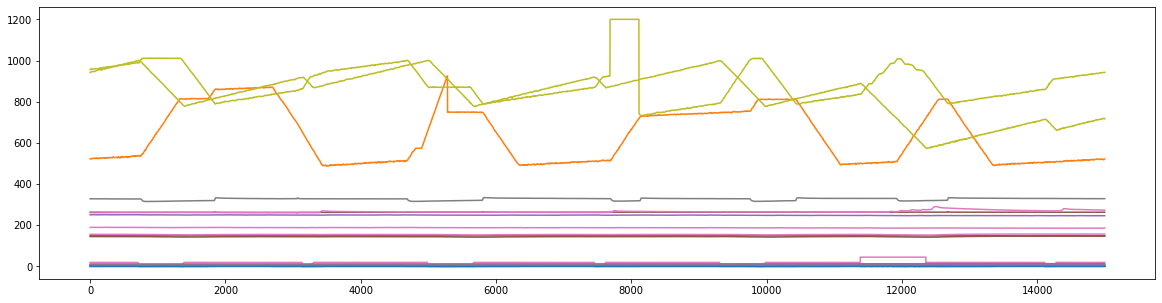

In [ ]:
# визуализируем исходный ряд
plt.figure(figsize=(20, 5))
plt.plot(ys_ds1)
plt.show()

In [ ]:
# отскалируем данные
ys_ds2 = MinMaxScaler([-1,1]).fit_transform(ys_ds1.reshape(-1,1)).squeeze()

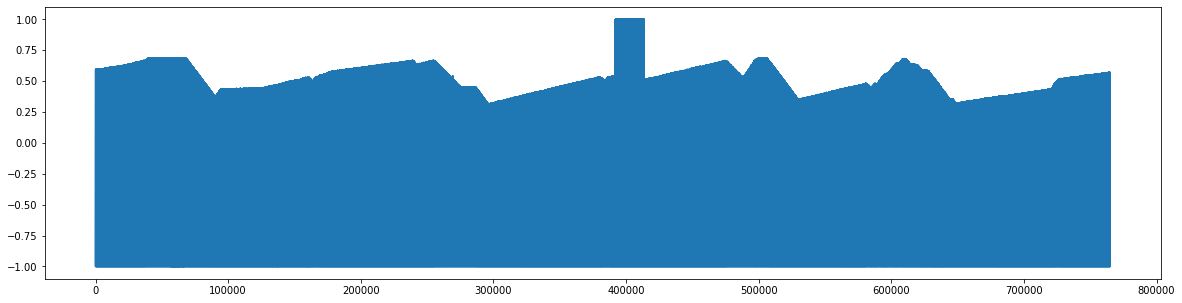

In [ ]:
# визуализируем скалированный ряд
plt.figure(figsize=(20, 5))
plt.plot(ys_ds2)
plt.show()

#### **Обучение модели**

In [ ]:
aeLoss = []
cxLoss = []
czLoss = []
cx_g_Loss = []
cz_g_Loss = []

In [ ]:
# инициализация модели
E, G, Cx, Cz, ae_model, cx_gan_model, cz_gan_model = init_model()

In [ ]:
# обучение
train_model(ys_ds2[:10000], 100, 128)

---------- Epoch: 1, batchCount 78 ----------
---------- Epoch: 2, batchCount 78 ----------
---------- Epoch: 3, batchCount 78 ----------
---------- Epoch: 4, batchCount 78 ----------
Эпоха 4
ae_loss 0.18484488129615784, cx_loss 0.772646963596344, cz_loss 0.2739241123199463, cx_g_loss 0.37173470854759216, cz_g_loss 0.0073778629302978516
---------- Epoch: 5, batchCount 78 ----------
---------- Epoch: 6, batchCount 78 ----------
---------- Epoch: 7, batchCount 78 ----------
---------- Epoch: 8, batchCount 78 ----------
Эпоха 8
ae_loss 0.1415879726409912, cx_loss 0.7740292549133301, cz_loss 0.5048373341560364, cx_g_loss 0.35733067989349365, cz_g_loss 0.03196077048778534
---------- Epoch: 9, batchCount 78 ----------
---------- Epoch: 10, batchCount 78 ----------
---------- Epoch: 11, batchCount 78 ----------
---------- Epoch: 12, batchCount 78 ----------
Эпоха 12
ae_loss 0.13714176416397095, cx_loss 0.7608985900878906, cz_loss 0.23930642008781433, cx_g_loss 0.3607165217399597, cz_g_loss 0.

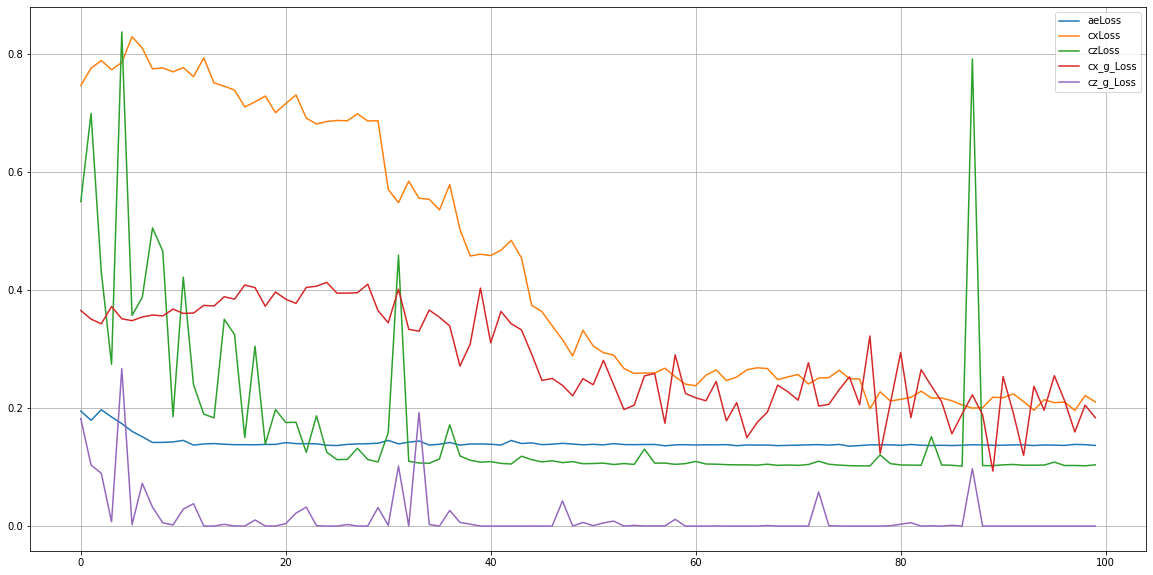

In [ ]:
# изменения ошибок в течение обучения
draw_losses(aeLoss, cxLoss, czLoss, cx_g_Loss, cz_g_Loss)

#### **Оценка результатов**

In [ ]:
predictions_ = get_reconstruction_segment(ae_model, ys_ds2[:15000], 0, len(ys_ds2[:15000]))

In [ ]:
labels_ = check_anomaly_pointwise_abs(ys_ds2, predictions_, 0.001)

unique, counts = np.unique(labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0   588]
 [    1 14412]]


Метрики

In [ ]:
# accuracy
metrics.accuracy_score(df_tadgan['Normal/Attack'].values[:len(labels_)].astype('int'), labels_)

0.26913333333333334

In [ ]:
# f1 score
metrics.f1_score(df_tadgan['Normal/Attack'].values[:len(labels_)].astype('int'), labels_)

0.39621082777991956

Визуализация предсказаний

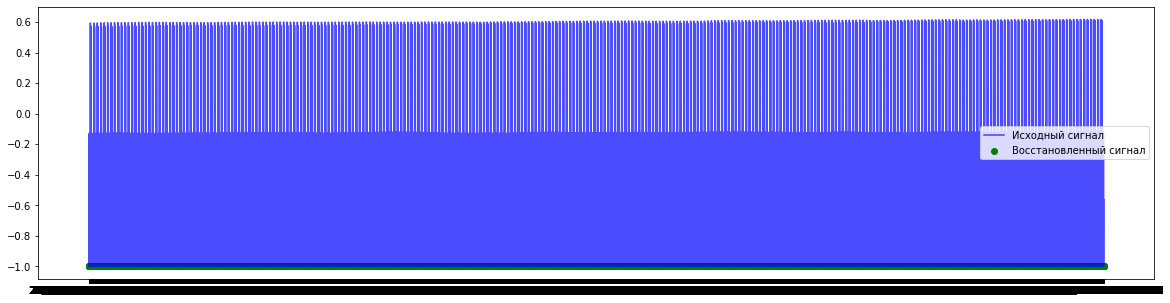

In [ ]:
draw_reconstruction_segment(xs_ds1, ys_ds2[:15000], predictions_, 0, len(ys_ds2[:15000]))

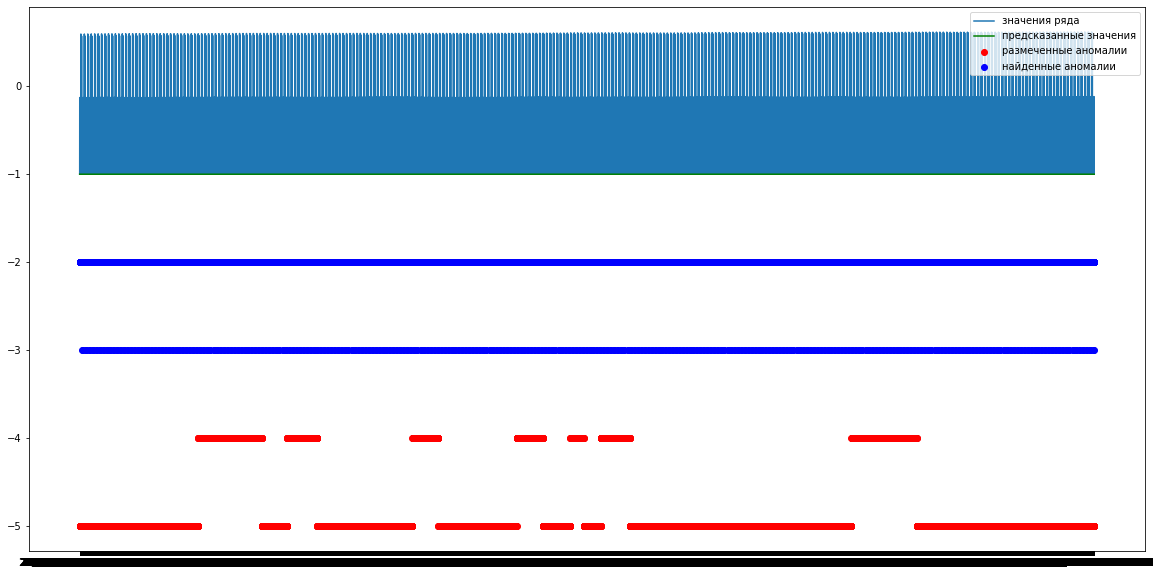

In [ ]:
# визуальная оценка аномалий
l_, r_ = 0, len(ys_ds2[:15000])

plt.figure(figsize=(20,10))
plt.plot(xs_ds1[l_:r_], ys_ds2[l_:r_], label='значения ряда')
plt.plot(xs_ds1[l_:r_], predictions_[l_:r_], c='g', label="предсказанные значения")
plt.scatter(xs_ds1[l_:r_], df_tadgan['Normal/Attack'].values[l_:r_]-5, c='r', label="размеченные аномалии")
plt.scatter(xs_ds1[l_:r_], np.array(labels_[l_:r_])-3, c='b', label="найденные аномалии")
plt.legend()
plt.show()

Таким образом были исследованы аномалии данных с течением времени